### Install and Import Dependencies

In [ ]:
# Basic dependencies
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# sklearn for dataset and models
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import mean_squared_error, r2_score

### Load and Explore Dataset

In [ ]:
# Load California Housing dataset
housing = fetch_california_housing(as_frame=True)
df = housing.frame

# Show dataset info
print("Dataset Shape:", df.shape)
df.head()

In [ ]:
print(housing.DESCR)

### Feature Exploration

In [ ]:
# Check missing values
print(df.isnull().sum())

In [ ]:
# Summary statistics
print(df.describe())

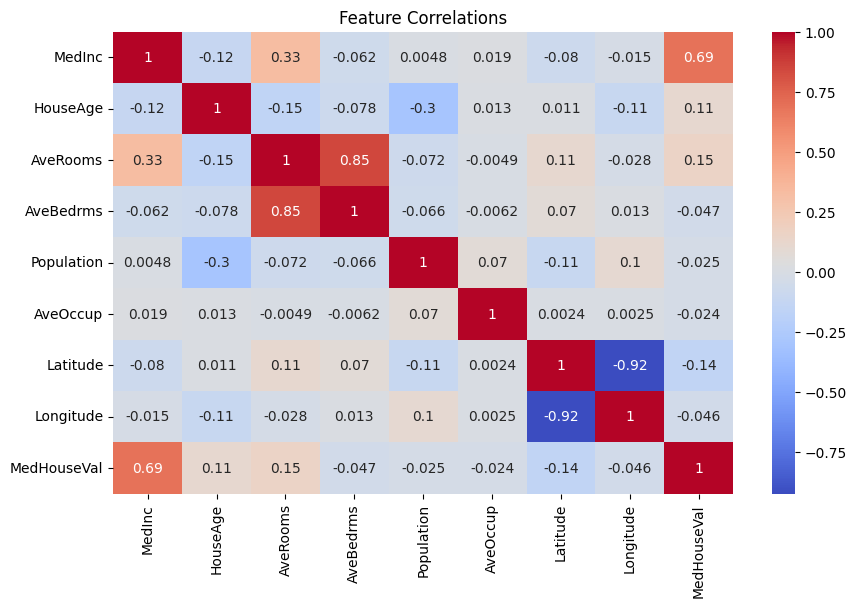

In [ ]:
# Correlation heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm")
plt.title("Feature Correlations")
plt.show()

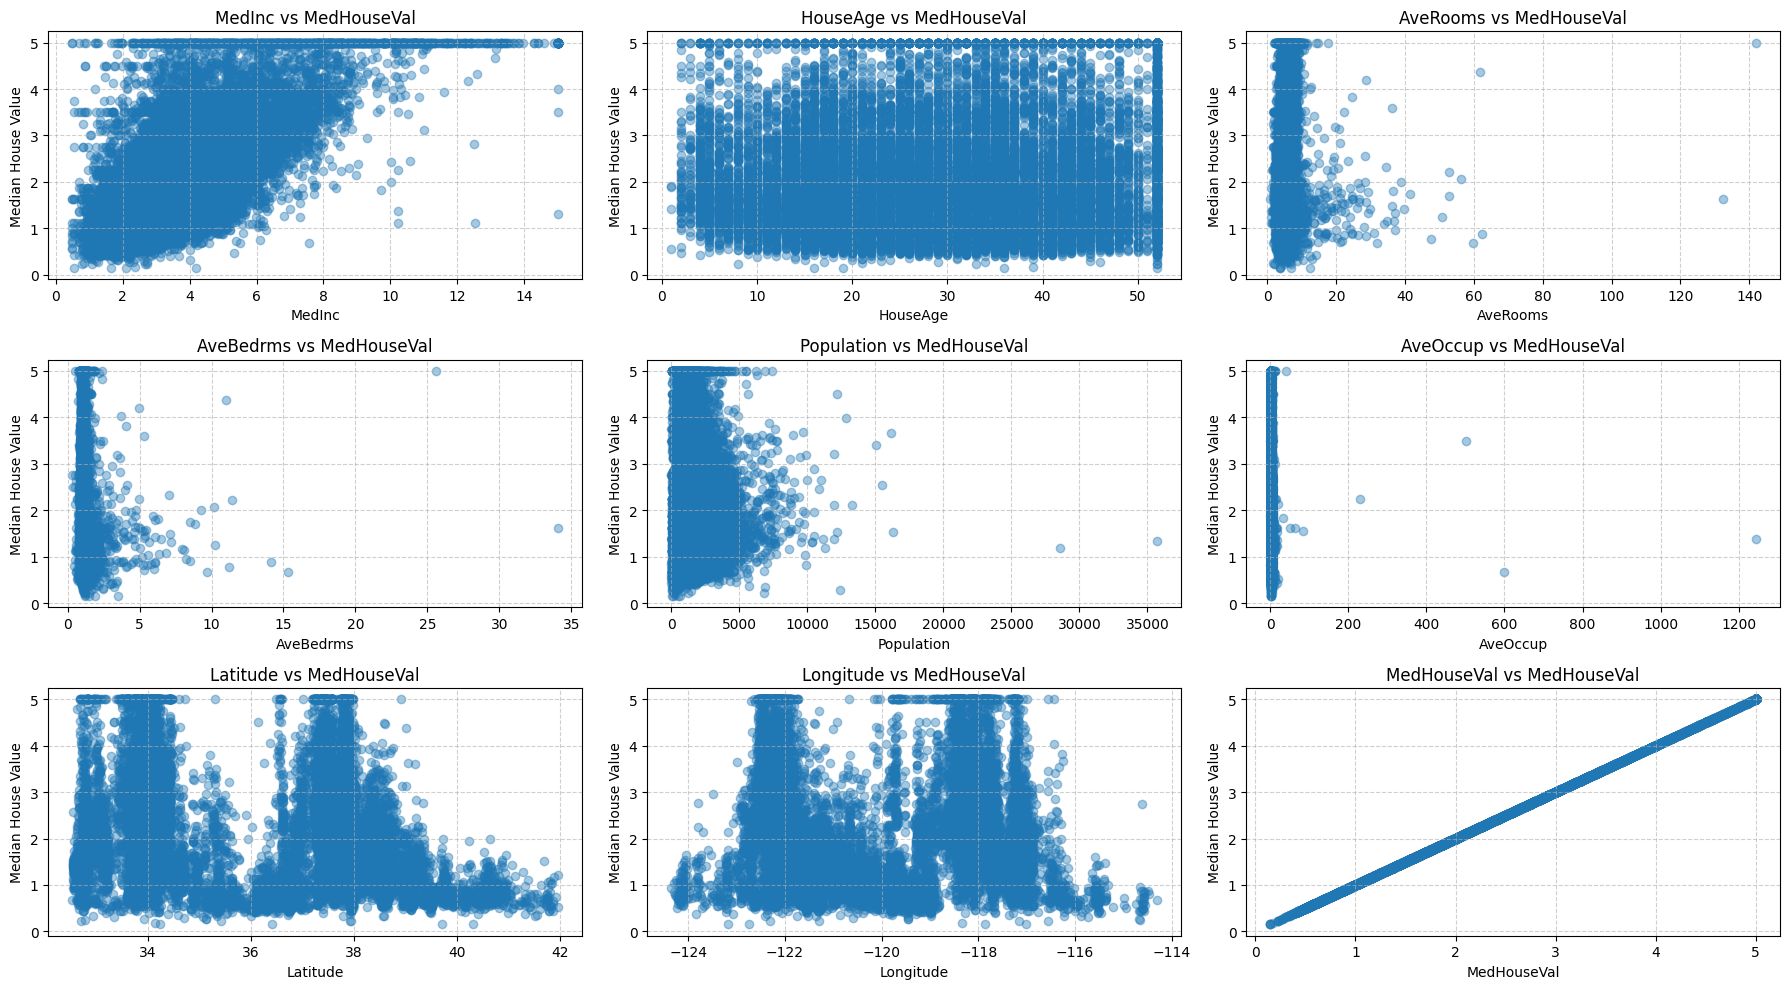

In [ ]:
# Target variable
target = "MedHouseVal"

# First 3 features from dataset
features = df.columns[:9]   # picks first 3 features automatically
#features = features.flatten()

fig, axes = plt.subplots(3, 3, figsize=(18, 10))
axes = axes.flatten()

for i, feature in enumerate(features):
    axes[i].scatter(df[feature], df[target], alpha=0.4)
    axes[i].set_xlabel(feature)
    axes[i].set_ylabel("Median House Value")
    axes[i].set_title(f"{feature} vs {target}")
    axes[i].grid(True, linestyle='--', alpha=0.6)

plt.tight_layout()
plt.show()

### Feature Selection and Train Test Split

In [ ]:
# Let's predict house value (target: MedHouseVal)
X = df.drop("MedHouseVal", axis=1)
y = df["MedHouseVal"]

# Scale features for gradient descent
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

print("Train shape:", X_train.shape, "Test shape:", X_test.shape)

Train shape: (16512, 8) Test shape: (4128, 8)


## Part-I: Linear Regression with Gradient Descent (From Scratch)

### Batch Gradient Descent

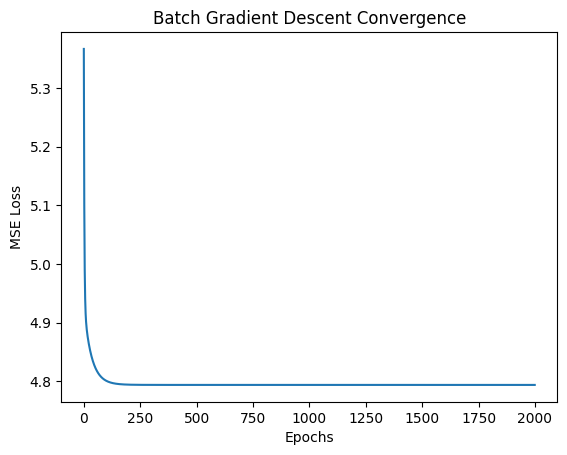

In [ ]:
# Batch Gradient Descent Implementation
def batch_gradient_descent(X, y, lr=0.01, epochs=1000):
    m, n = X.shape
    theta = np.zeros(n)
    cost_history = []

    for _ in range(epochs):
        gradients = -2/m * X.T @ (y - X @ theta)
        theta -= lr * gradients
        cost = np.mean((y - X @ theta)**2)
        cost_history.append(cost)

    return theta, cost_history

# Train using Batch GD
theta, cost_history = batch_gradient_descent(X_train, y_train.values, lr=0.1, epochs=2000)

plt.plot(cost_history)
plt.xlabel("Epochs")
plt.ylabel("MSE Loss")
plt.title("Batch Gradient Descent Convergence")
plt.show()

### Evaluate Batch Gradient Descent

In [ ]:
y_pred_train = X_train @ theta
y_pred_test = X_test @ theta

print("Train RMSE:", np.sqrt(mean_squared_error(y_train, y_pred_train)))
print("Test RMSE:", np.sqrt(mean_squared_error(y_test, y_pred_test)))

Train RMSE: 2.18944024010166
Test RMSE: 2.20225931752914


## Part-II Scikit Learn Linear Regression

In [ ]:
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)

y_pred_sklearn = lin_reg.predict(X_test)

print("Sklearn Linear Regression RMSE:", np.sqrt(mean_squared_error(y_test, y_pred_sklearn)))

Sklearn Linear Regression RMSE: 0.7455813830127761


## Part-III Polynomial Regression

### Polynomial Features

In [ ]:
# Use only 1 feature for visualization (AveRooms)
X_poly = df[["AveRooms"]]
y_poly = df["MedHouseVal"]

In [ ]:
poly = PolynomialFeatures(degree=3, include_bias=False)
X_poly_transformed = poly.fit_transform(X_poly)

X_train_p, X_test_p, y_train_p, y_test_p = train_test_split(X_poly_transformed, y_poly, test_size=0.2, random_state=42)

In [ ]:
lin_reg_poly = LinearRegression()
lin_reg_poly.fit(X_train_p, y_train_p)

y_pred_poly = lin_reg_poly.predict(X_test_p)

print("Polynomial Regression RMSE:", np.sqrt(mean_squared_error(y_test_p, y_pred_poly)))

Polynomial Regression RMSE: 1.10078129634097


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(


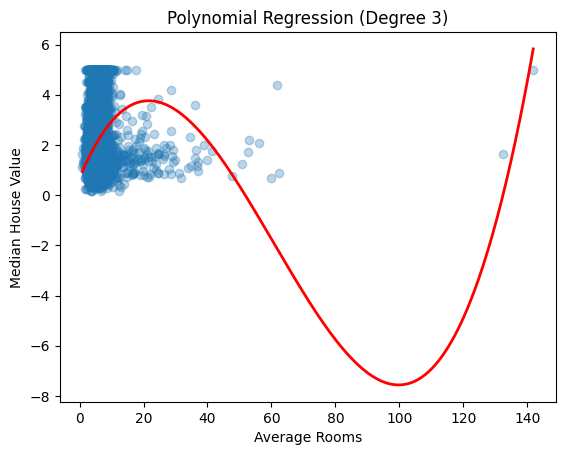

In [ ]:
# Sort values for smooth curve
X_seq = np.linspace(X_poly.min(), X_poly.max(), 300).reshape(-1, 1)
X_seq_poly = poly.transform(X_seq)
y_seq_pred = lin_reg_poly.predict(X_seq_poly)

plt.scatter(X_poly, y_poly, alpha=0.3)
plt.plot(X_seq, y_seq_pred, color="red", linewidth=2)
plt.xlabel("Average Rooms")
plt.ylabel("Median House Value")
plt.title("Polynomial Regression (Degree 3)")
plt.show()

## Part-IV Linear Regression with Regularization:

### Ridge Regression

In [ ]:
ridge_reg = Ridge(alpha=1.0)
ridge_reg.fit(X_train, y_train)
y_pred_ridge = ridge_reg.predict(X_test)

print("Ridge RMSE:", np.sqrt(mean_squared_error(y_test, y_pred_ridge)))

Ridge RMSE: 0.745554290938461


### Lasso Regression

In [ ]:
lasso_reg = Lasso(alpha=0.1)
lasso_reg.fit(X_train, y_train)
y_pred_lasso = lasso_reg.predict(X_test)

print("Lasso RMSE:", np.sqrt(mean_squared_error(y_test, y_pred_lasso)))

Lasso RMSE: 0.824349148731848


## Part-V Comparison of Models

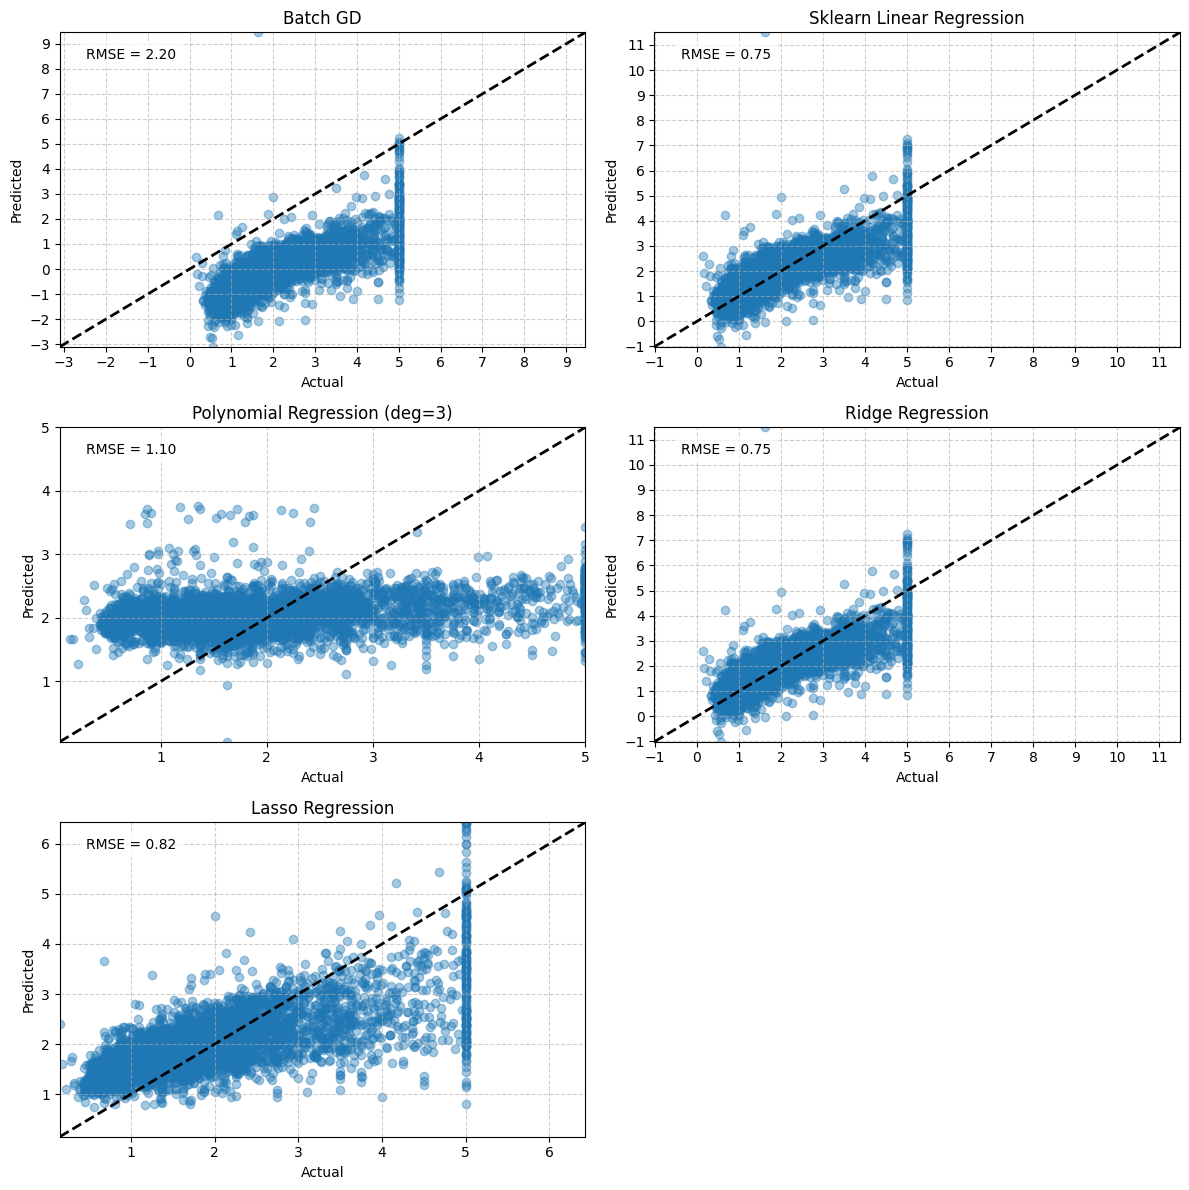

In [ ]:
import matplotlib.ticker as ticker

fig, axes = plt.subplots(3, 2, figsize=(12, 12))
axes = axes.flatten()

# Helper function for scatter plots with RMSE
def plot_actual_vs_pred(ax, y_true, y_pred, title):
    ax.scatter(y_true, y_pred, alpha=0.4)
    lims = [min(y_true.min(), y_pred.min()), max(y_true.max(), y_pred.max())]
    ax.plot(lims, lims, 'k--', linewidth=2)
    ax.set_xlim(lims)
    ax.set_ylim(lims)
    ax.set_xlabel("Actual")
    ax.set_ylabel("Predicted")
    ax.set_title(title)

    # Add grid with resolution 1.0
    ax.grid(True, linestyle='--', alpha=0.6)
    ax.xaxis.set_major_locator(ticker.MultipleLocator(1.0))
    ax.yaxis.set_major_locator(ticker.MultipleLocator(1.0))

    # Compute RMSE
    rmse = np.sqrt(mean_squared_error(y_true, y_pred))
    ax.text(0.05, 0.95, f"RMSE = {rmse:.2f}", transform=ax.transAxes,
            fontsize=10, verticalalignment='top',
            bbox=dict(facecolor='white', alpha=0.7, edgecolor='none'))

# 1. Batch GD
plot_actual_vs_pred(axes[0], y_test, y_pred_test, "Batch GD")

# 2. Sklearn Linear Regression
plot_actual_vs_pred(axes[1], y_test, y_pred_sklearn, "Sklearn Linear Regression")

# 3. Polynomial Regression
plot_actual_vs_pred(axes[2], y_test_p, y_pred_poly, "Polynomial Regression (deg=3)")

# 4. Ridge
plot_actual_vs_pred(axes[3], y_test, y_pred_ridge, "Ridge Regression")

# 5. Lasso (centered in last row)
plot_actual_vs_pred(axes[4], y_test, y_pred_lasso, "Lasso Regression")

# Hide the empty subplot (last one in row 3, col 2)
fig.delaxes(axes[5])

plt.tight_layout()
plt.show()

## Excercise

Try different combinations of features and compare the models.